In [1]:
# Simple KNN on MNIST
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
# 10 clusters
n_clusters = 10
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
# Evaluate the K-Means clustering accuracy.
accuracy = accuracy_score(y, y_pred_kmeans)

/home/arkane/miniconda3/envs/quick_tf_gpu/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/arkane/miniconda3/envs/quick_tf_gpu/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

In [2]:
# Design autoencoder and decoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)



2023-02-20 19:30:29.574299: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-20 19:30:29.575545: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-20 19:30:29.604419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 19:30:29.605494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.392GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2023-02-20 19:30:29.605578: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-20 19:30:29.608817: I tensorflow/stream_executor/platform/default

In [3]:
# Let's also create a separate encoder model:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
# Insert model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

2023-02-20 19:30:30.829332: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-20 19:30:30.849125: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3393305000 Hz


Epoch 1/50
  1/235 [..............................] - ETA: 1:43 - loss: 0.6937

2023-02-20 19:30:31.145355: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


235/235 [==============================] - 2s 5ms/step - loss: 0.3819 - val_loss: 0.1891
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1793 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1489 - val_loss: 0.1333
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1314 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1203 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1124 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1066 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1024 - val_loss: 0.0989
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0997 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0975 - val_loss: 0.0953
Epoch 11/5

In [8]:
# After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.09. 
# We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

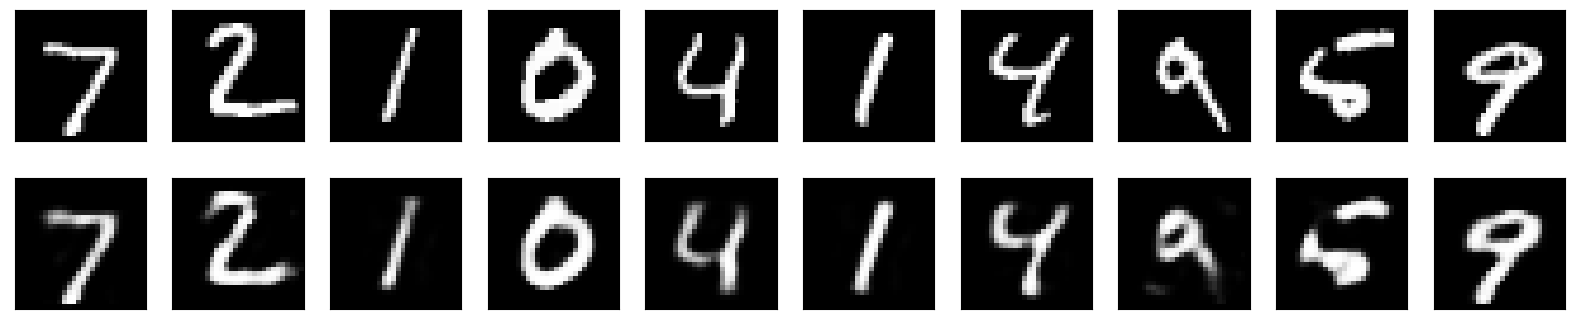

In [9]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# deeper model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,)) 
#decoder_layer = autoencoder.layers[-1] 
#decoder = Model(encoded_input, decoder_layer(encoded_input)) 

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3338 - val_loss: 0.1627
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1539 - val_loss: 0.1352
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1337 - val_loss: 0.1241
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1236 - val_loss: 0.1182
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1174 - val_loss: 0.1118
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1123 - val_loss: 0.1080
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1082 - val_loss: 0.1050
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1031
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1040 - val_loss: 0.1014
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.1006

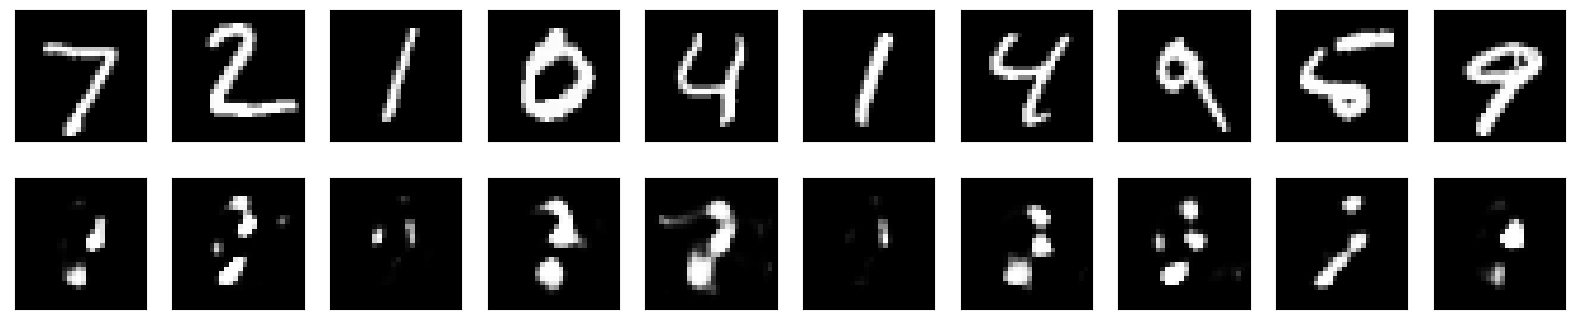

In [11]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [4]:
import pandas as pd

# Regression example
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
    train , test = get_data()
    target = train.SalePrice
    train.drop(['SalePrice'],axis = 1 , inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Id'], inplace=True, axis=1)
    return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()


In [5]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
# Drop missing values
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

# Call the function
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [7]:
# How many columns we got
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


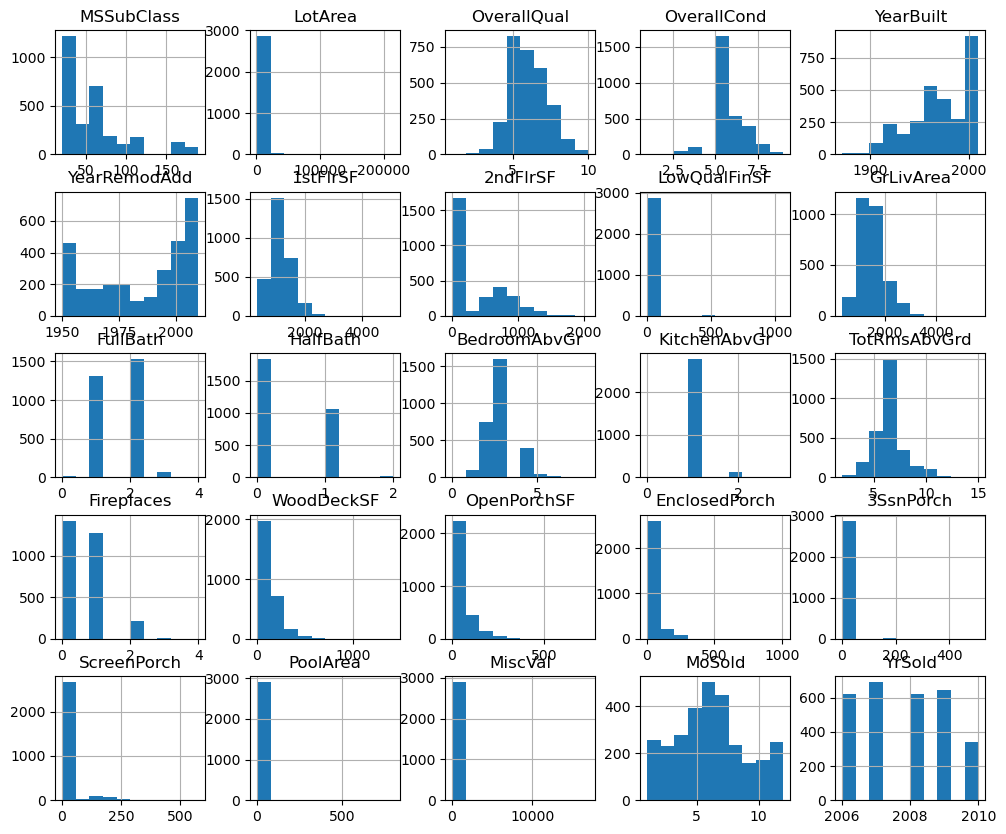

In [8]:
import matplotlib.pyplot as plt
# Plot the variables
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

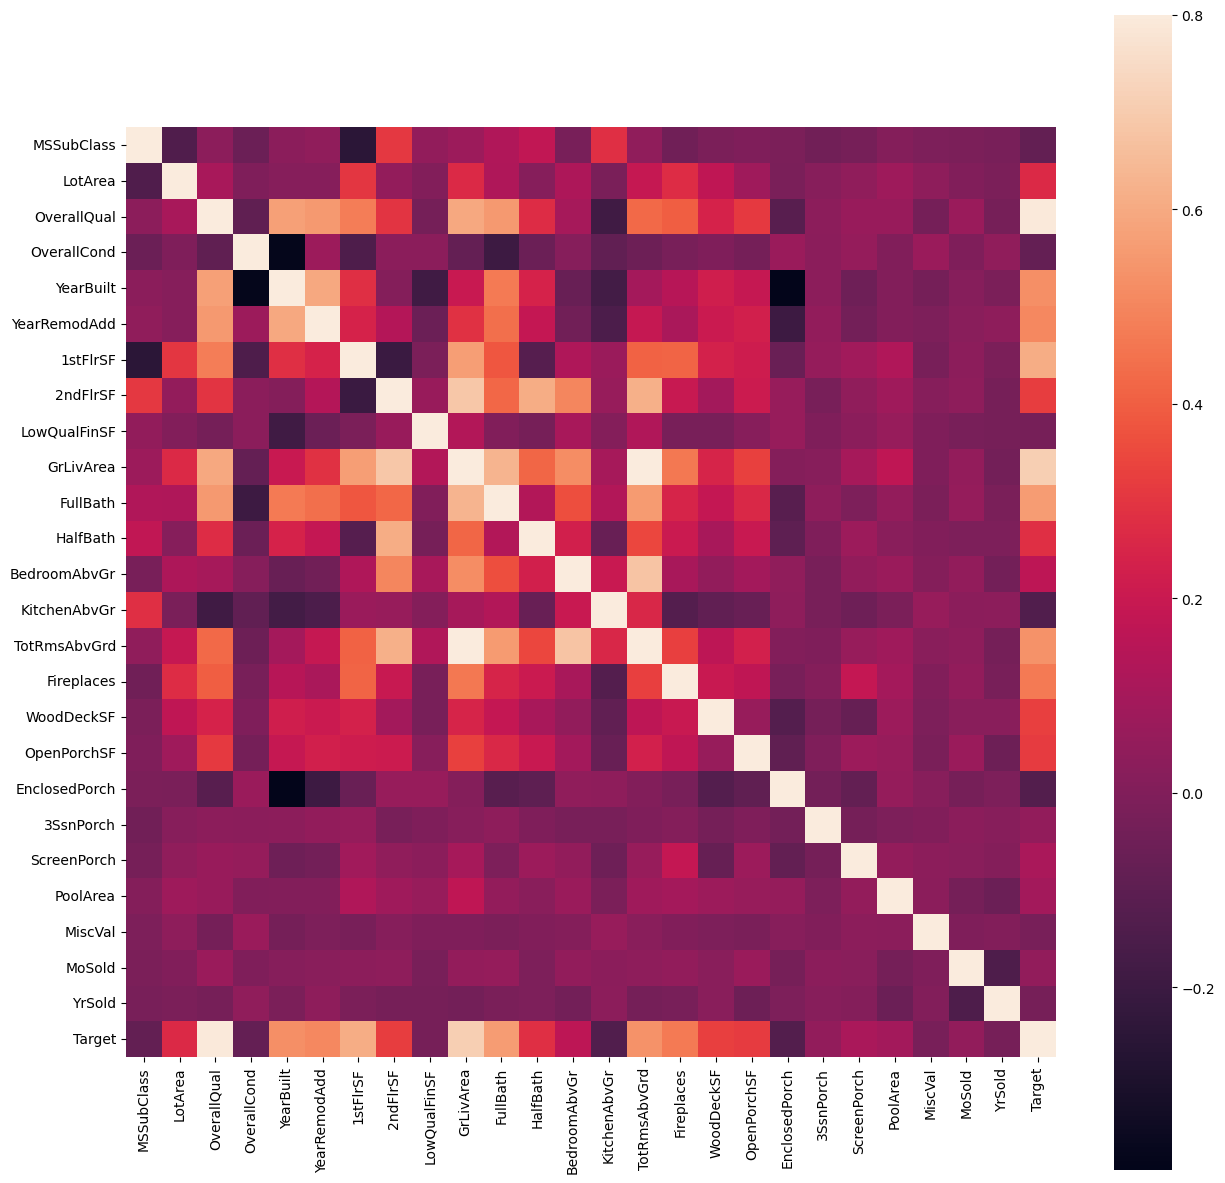

In [9]:
import seaborn as sb
# How many of features are correlated
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()
# Looks like 15 correlated features

In [10]:
import numpy as np
# We will encode the categorical features using one hot encoding.
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [11]:
# Split data to train and test
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()


In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

# Use ‘relu’ as the activation function for the hidden layers
# Use a ‘normal’ initializer as the kernal_intializer

#Define the output layer with only one node
#Use ‘linear ’as the activation function for the output layer
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

2023-02-20 20:26:08.736224: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-20 20:26:08.737324: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-20 20:26:08.782024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 20:26:08.782605: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.392GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2023-02-20 20:26:08.782627: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-20 20:26:08.783851: I tensorflow/stream_executor/platform/default

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               19200     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-02-20 20:26:08.785757: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2023-02-20 20:26:08.786155: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.10
2023-02-20 20:26:08.787521: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusolver.so.10
2023-02-20 20:26:08.788379: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.10
2023-02-20 20:26:08.792171: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-02-20 20:26:08.792525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a checkpoint to save the data
checkpoint_name = './Models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]



In [14]:
# Train the model
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500


2023-02-20 20:26:09.532639: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-20 20:26:09.553140: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3393305000 Hz


29/37 [======================>.......] - ETA: 0s - loss: 173991.9472 - mean_absolute_error: 173991.9472 

2023-02-20 20:26:09.901536: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


37/37 [==============================] - 1s 8ms/step - loss: 166221.7488 - mean_absolute_error: 166221.7488 - val_loss: 53221.8047 - val_mean_absolute_error: 53221.8047

Epoch 00001: val_loss improved from inf to 53221.80469, saving model to ./Models/Weights-001--53221.80469.hdf5
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 54968.1206 - mean_absolute_error: 54968.1206 - val_loss: 47465.1250 - val_mean_absolute_error: 47465.1250

Epoch 00002: val_loss improved from 53221.80469 to 47465.12500, saving model to ./Models/Weights-002--47465.12500.hdf5
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 45599.0461 - mean_absolute_error: 45599.0461 - val_loss: 43854.0625 - val_mean_absolute_error: 43854.0625

Epoch 00003: val_loss improved from 47465.12500 to 43854.06250, saving model to ./Models/Weights-003--43854.06250.hdf5
Epoch 4/500
37/37 [==============================] - 0s 5ms/step - loss: 43581.5886 - mean_absolute_error: 43581.5886 - v

In [15]:
# Load wights file of the best model :
wights_file = './Models/Weights-045--19749.57227.hdf5' # choose the best checkpoint- YOURS IS DIFFERENT THAN THIS NUMBER 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [16]:
# Make predictions
predictions = NN_model.predict(test)

In [17]:
predictions

array([[122458.336],
       [175047.11 ],
       [187896.34 ],
       ...,
       [176125.73 ],
       [147350.61 ],
       [227684.2  ]], dtype=float32)

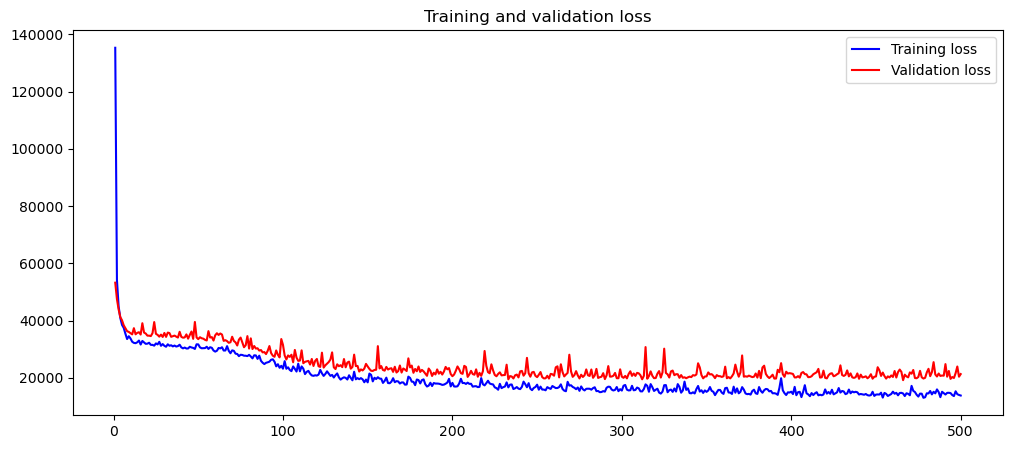

In [18]:
#plt.style.use('ggplot')

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(hist)

In [19]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 30)
callbacks_list= ModelCheckpoint('./Models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5', monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [20]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Epoch 1/500
37/37 [==============================] - 1s 10ms/step - loss: 15812.0281 - mean_absolute_error: 15812.0281 - val_loss: 21923.2461 - val_mean_absolute_error: 21923.2461
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 10295.2313 - mean_absolute_error: 10295.2313 - val_loss: 20677.0039 - val_mean_absolute_error: 20677.0039
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 9204.8875 - mean_absolute_error: 9204.8875 - val_loss: 20696.5723 - val_mean_absolute_error: 20696.5723
Epoch 4/500
37/37 [==============================] - 0s 4ms/step - loss: 10365.3275 - mean_absolute_error: 10365.3275 - val_loss: 20159.0059 - val_mean_absolute_error: 20159.0059
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 9859.1837 - mean_absolute_error: 9859.1837 - val_loss: 20022.0117 - val_mean_absolute_error: 20022.0117
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 10121.9396 - mean_absolute_error: 1

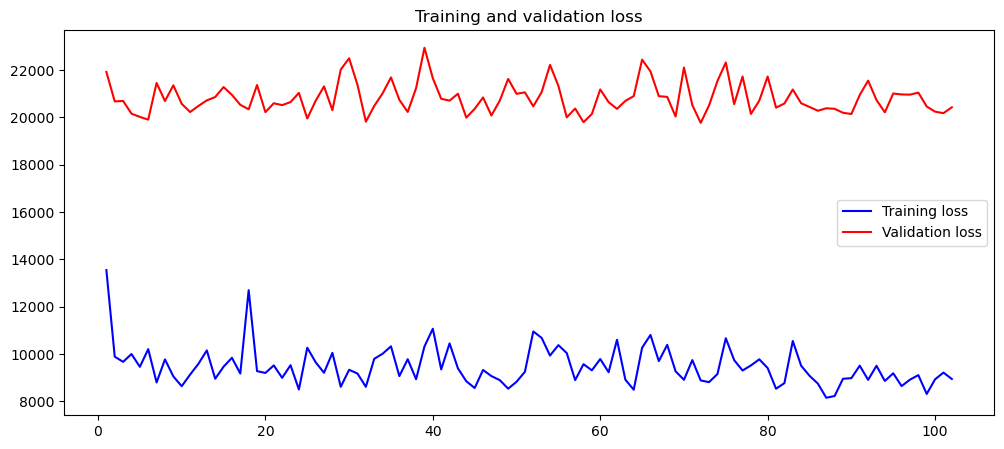

In [21]:
plot_history(hist)

# Assignment 7

#### We had a argument named patience in early stopping code. Change this number to 20 and see how number of epochs is changed. What is this patience based on your findings?

In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 20)
callbacks_list= ModelCheckpoint('./Models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5', monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [23]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Epoch 1/500
37/37 [==============================] - 0s 4ms/step - loss: 8674.7324 - mean_absolute_error: 8674.7324 - val_loss: 21328.6152 - val_mean_absolute_error: 21328.6152
Epoch 2/500
37/37 [==============================] - 0s 4ms/step - loss: 8367.8086 - mean_absolute_error: 8367.8086 - val_loss: 20780.4277 - val_mean_absolute_error: 20780.4277
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 9152.7148 - mean_absolute_error: 9152.7148 - val_loss: 20704.1875 - val_mean_absolute_error: 20704.1875
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 8726.9570 - mean_absolute_error: 8726.9570 - val_loss: 21595.5547 - val_mean_absolute_error: 21595.5547
Epoch 5/500
37/37 [==============================] - 0s 4ms/step - loss: 9061.8584 - mean_absolute_error: 9061.8584 - val_loss: 20448.0176 - val_mean_absolute_error: 20448.0176
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 8866.5244 - mean_absolute_error: 8866.5244

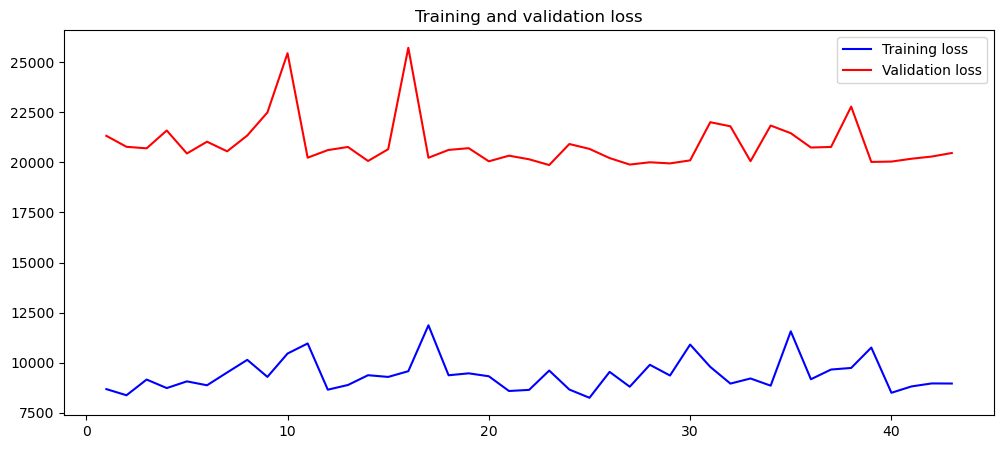

In [24]:
plot_history(hist)

'patience' is similar to 'epoch' but instead of setting the number of iterations a model will perform to improve model accuracy/performance the model instead will set the number of epoch that a model is allowed to iterate if there are no model improvements. From the model above we see that by recuing the patience it significantly changes the model loss. Overall, the model loss on this graph shows the model is overfitted to the data.



#### We trained a regression model but we did not analyze the performance of the model. Suggest a method to see the performance of the model. Note that since we are not dealing with categorical data, we cannot report the accuracy.

Since this DNN model uses regression there are three metrics that one can use to measure the performance. To measure the performance of a linear regression model we can either calculate the root mean square error, mean square error and r-squared. The best alue to observe here is the r-squared value as it is usually the best metric to use in regression models.

In [25]:
# Make predictions
predictions2 = NN_model.predict(train).flatten()

In [26]:
predictions2

array([199896.14, 172357.53, 210732.11, ..., 253524.95, 119348.81,
       153704.92], dtype=float32)

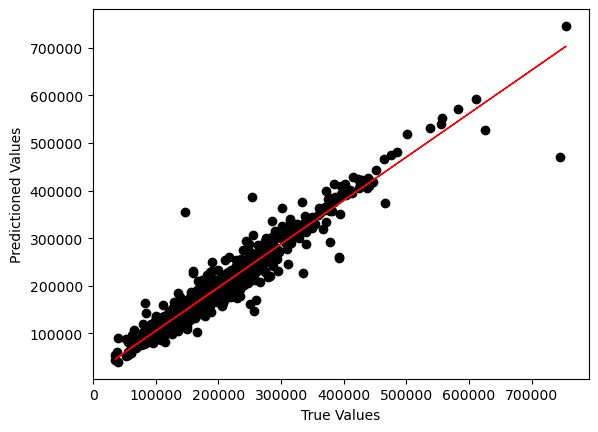

In [27]:
x = target
y = predictions2
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='black')
plt.plot(x, a*x+b, color="red", linestyle='-', linewidth=1)
plt.xlabel("True Values")
plt.ylabel("Predictioned Values")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print('MSE: ', mean_squared_error(x, y))
print('RMSE: ', math.sqrt(mean_squared_error(x, y)))
print('R2: ', r2_score(x, x*a+b))

MSE:  373857955.45264566
RMSE:  19335.406782704253
R2:  0.9918355407721281


From the graph, RMSE and R2 scores we can see that the model performed well where the predicted values had little deviations from the expected value.